# <center>  EDA </br>
#  <center> -- Análisis Exploratorio de Datos--</center>
Como científicos de datos y analistas, se exploran diferentes aspectos de los datos, como la distribución de variables, relaciones entre variables, tendencias a lo largo del tiempo, y cualquier otra característica que pueda ser relevante para comprender la naturaleza de los datos.
<center> Aquí lo haremos sobre los datos de los juegos

### <center>Importar Librerias</center>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import funciones
import os
from wordcloud import WordCloud
from collections import Counter

%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")

____________

### <center>Extracción de datos</center>

In [2]:
# Se obtine la ruta completa al archivo CSV desde la ubicación del notebook
csv_path = os.path.join('..', 'CSV', 'games_limpio.csv')

# Lee el archivo CSV
df_games = pd.read_csv(csv_path, encoding='utf-8')

_______________


In [3]:
# Se da una primera vista al dataframe
df_games.head()

,genres,title,reviews_url,price,item_id,developer,release_year
0,Action,Lost Summoner Kitty,http://steamcommunity.com/app/761140/reviews/?...,4.99,761140,Kotoshiro,2018
1,Casual,Lost Summoner Kitty,http://steamcommunity.com/app/761140/reviews/?...,4.99,761140,Kotoshiro,2018
2,Indie,Lost Summoner Kitty,http://steamcommunity.com/app/761140/reviews/?...,4.99,761140,Kotoshiro,2018
3,Simulation,Lost Summoner Kitty,http://steamcommunity.com/app/761140/reviews/?...,4.99,761140,Kotoshiro,2018
4,Strategy,Lost Summoner Kitty,http://steamcommunity.com/app/761140/reviews/?...,4.99,761140,Kotoshiro,2018


____________________

### <center>Visualización de tipos de datos y nulos</center>


In [4]:
# Se verifica tipo de dato y nulos de cada columna
funciones.verificar_tipo_datos(df_games)

,Columna,Tipo,NO_nulos_%,Nulos_%,Nulos
0,genres,[<class 'str'>],100.00,0.00,0
1,title,"[<class 'str'>, <class 'float'>]",100.00,0.00,2
2,reviews_url,[<class 'str'>],100.00,0.00,0
3,price,[<class 'float'>],100.00,0.00,0
4,item_id,[<class 'int'>],100.00,0.00,0
5,developer,"[<class 'str'>, <class 'float'>]",99.51,0.49,350
6,release_year,[<class 'str'>],100.00,0.00,0


_____________

### <center>Columna genres</center>
<center>Se analiza las distintas categorias presente en los juegos</center>

In [5]:
# Se visualiza la aparición de los distintos generes y su porcentaje
funciones.valor_en_porcentaje(df_games, 'genres')

,Cantidad,Porcentaje
genres,,
Indie,15858,22.16%
Action,11319,15.82%
Casual,8282,11.57%
Adventure,8242,11.52%
Strategy,6957,9.72%
Simulation,6699,9.36%
RPG,5479,7.66%
Free to Play,2031,2.84%
Early Access,1462,2.04%


GRAFICAMOS

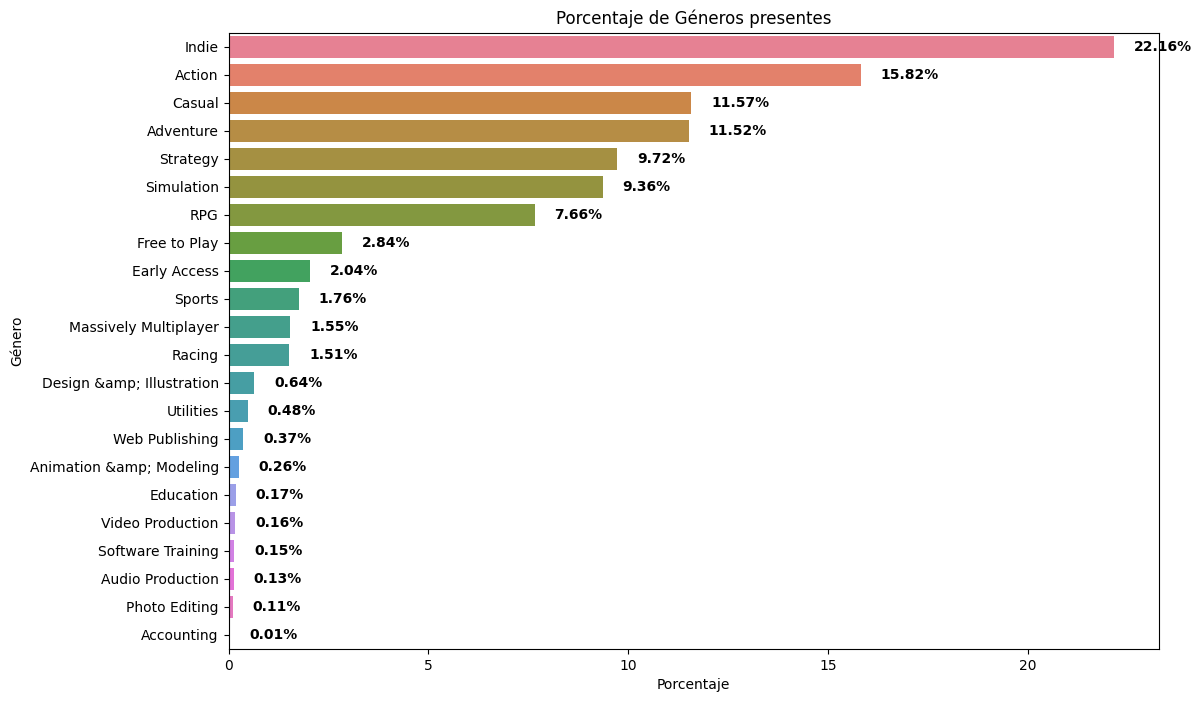

In [6]:
# Se obtine la cantidad de cada valor en la columna 'genres'
genres_counts = df_games['genres'].value_counts()

# Se calcula el porcentaje de cada valor
genres_percentages = genres_counts / genres_counts.sum() * 100

# Se crea un color para cada barra
colors = sns.color_palette("husl", n_colors=len(genres_counts))

# S ordenan los valores por porcentaje de mayor a menor (importancia)
sorted_genres_percentages = genres_percentages.sort_values(ascending=False)

# Se grafica barras horizontale
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=sorted_genres_percentages, y=sorted_genres_percentages.index, palette=colors)
plt.title('Porcentaje de Géneros presentes')
plt.xlabel('Porcentaje')
plt.ylabel('Género')

# Se agrega el porcentaje al final de cada barra
for i, v in enumerate(sorted_genres_percentages):
    ax.text(v + 0.5, i, f'{v:.2f}%', va='center', color='black', fontweight='bold')

plt.show()





### CONCLUSION: las categorias más desarrolladas de juegos son Indi, Action, Casual y Adventure. Igual esta columna se a desanido, por lo que un juego puede tener más de una categoría 

_________________

### <center>Columna release_year/center>
<center>Se analiza el comportamiento por año</center>

In [7]:
# Se visualiza a traves de esta funcion creada la cantidad de ocurrencia y su porcentaje
funciones.valor_en_porcentaje(df_games, 'release_year')

,Cantidad,Porcentaje
release_year,,
2017,24967,34.89%
2016,17667,24.69%
2015,12256,17.13%
2014,6341,8.86%
2013,3016,4.22%
2012,2106,2.94%
2011,986,1.38%
Dato no disponible,850,1.19%
2010,653,0.91%


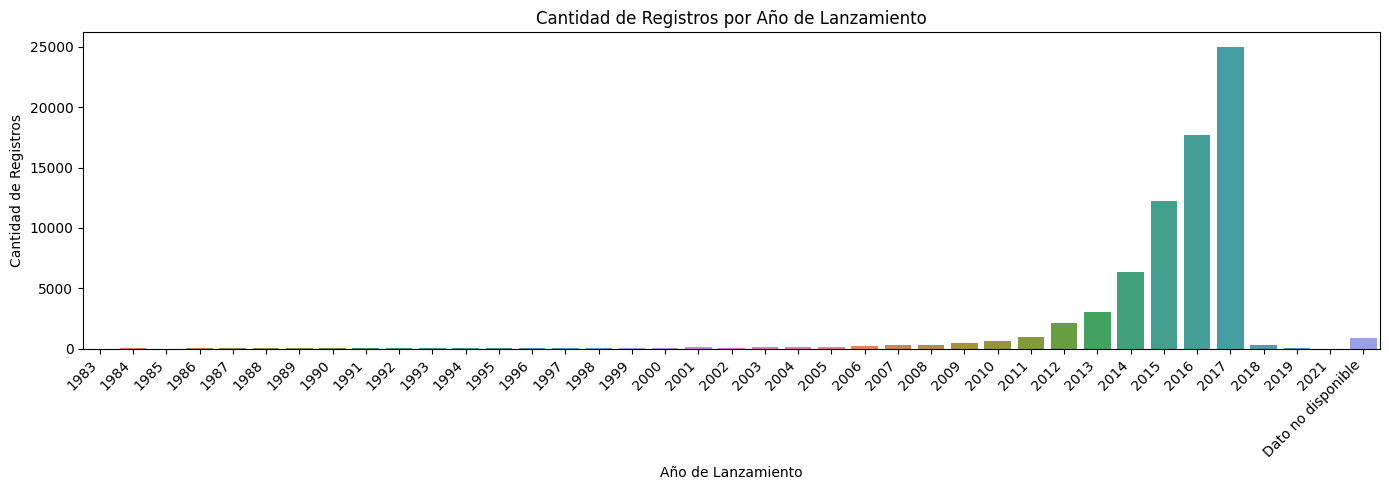

In [8]:
# Se cuenta la frecuencia de cada año
conteo_year = df_games['release_year'].value_counts()

# Se ordenan los valores para que 'Datos no disponibles' queden al final
conteo_year = conteo_year.reindex(['Dato no disponible'] + list(conteo_year.index))

# Se ordenan los valores por año
conteo_anios = conteo_year.sort_index()

# Se crea un color para cada barra
colors = sns.color_palette("husl", n_colors=len(genres_counts))

# Se crea la gráfica de barras
plt.figure(figsize=(14, 5))
ax = sns.barplot(x=conteo_anios.index, y=conteo_anios.values, palette=colors)
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Registros')
plt.title('Cantidad de Registros por Año de Lanzamiento')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


CONCLUSION: 
- la plataforma fue lanzada en el año 2003, por lo que hay juegos anteriores. 
- entre el 2014 y el 2017 hay una explosión muy grande
- hay varios juegos sin año, por una mala carga o porque no se especificó.

______________


### <center>Columna developer</center>
<center>Se analiza las distintas categorias presente en los developer (Empresas Desarrolladoras))</center>

In [9]:
# Se visualiza la cantidad de aparición de cada uno y sus porcentajes
funciones.valor_en_porcentaje(df_games, 'developer')

,Cantidad,Porcentaje
developer,,
Ubisoft - San Francisco,2516,3.52%
"SmiteWorks USA, LLC",2364,3.30%
DL Softworks,495,0.69%
Ronimo Games,379,0.53%
Paradox Development Studio,311,0.43%
...,...,...
Viron Shake,1,0.00%
Fewjix,1,0.00%
Kyuppin,1,0.00%


GRAFICAMOS

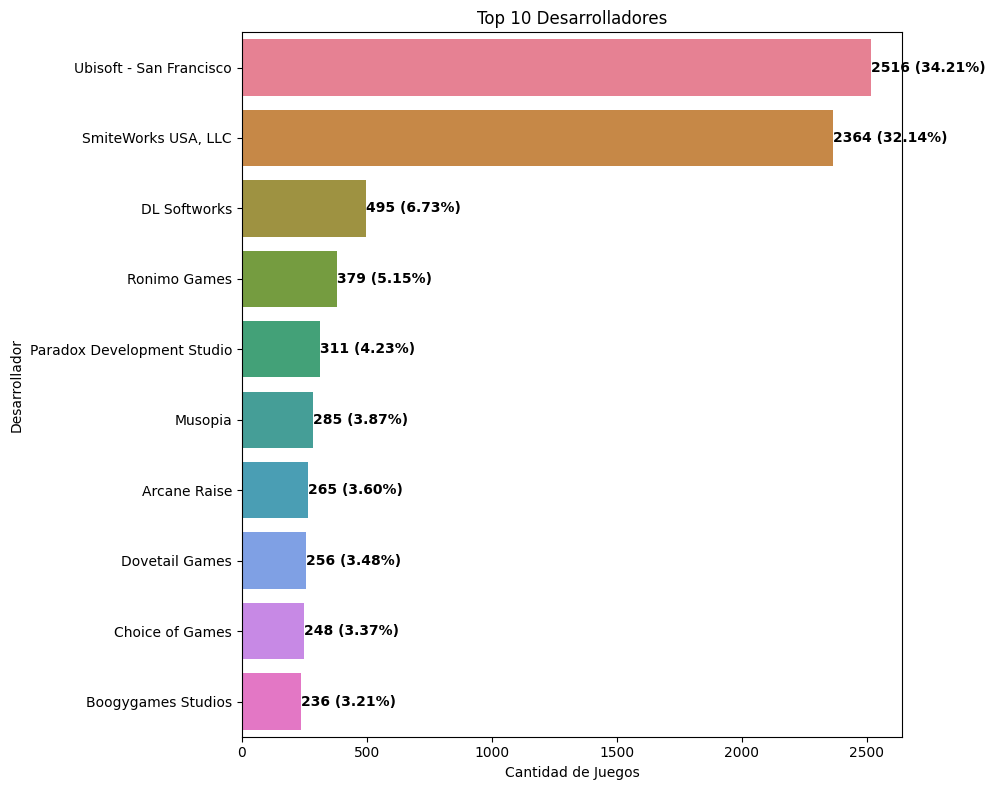

In [10]:
# Se cuenta la frecuencia de cada desarrollador
conteo_developer = df_games['developer'].value_counts()

# Se filtrar los desarrolladores con una frecuencia mayor a 1 para simplificar el gráfico
conteo_developer = conteo_developer[conteo_developer > 1]

# Se obtiner los 10 desarrolladores más frecuentes
top_10_developer = conteo_developer.head(10)

# Se calcula el porcentaje de cada desarrollador
porcentaje_developer = top_10_developer / top_10_developer.sum() * 100

# Se crear un color para cada barra
colors = sns.color_palette("husl", n_colors=len(top_10_developer))

# Se grafica con barras horizontales
plt.figure(figsize=(10, 8))
ax = sns.barplot(x=top_10_developer.values, y=top_10_developer.index, palette=colors, orient='horizontal')
plt.xlabel('Cantidad de Juegos')
plt.ylabel('Desarrollador')
plt.title('Top 10 Desarrolladores')

# Se agregar el porcentaje en las puntas de las barras
for i, v in enumerate(top_10_developer.values):
    ax.text(v + 0.5, i, f'{v} ({porcentaje_developer.iloc[i]:.2f}%)', ha='left', va='center', color='black', fontweight='bold')

plt.tight_layout()
plt.show()


CONCLUSION: tenemos dos desarrolladores que sobresalen, SmiteWorks y DL Softworks con una aparición del casi 35% cada uno, el resto solo con un 3% aproximadamente. Los que no se tuvieron en cuenta en la grafica tienen casi un 0% de aparición

____________

### <center>Columna price</center>
<center>Se analiza Los valores de los juegos</center>

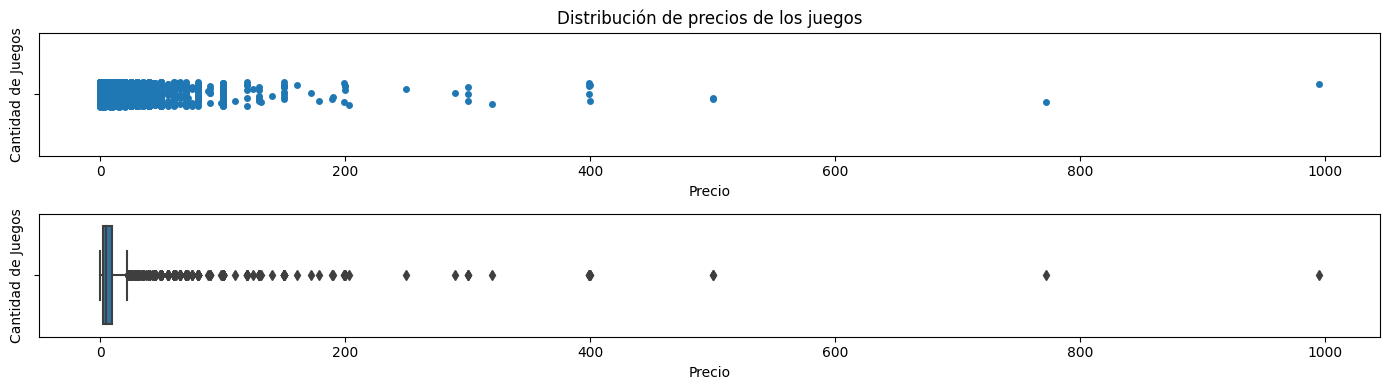

In [11]:
# Se obtienen los precios para cada juego
precio_unicos = df_games.groupby('item_id')['price'].unique().reset_index().explode('price')
df_precio_unicos = precio_unicos['price']

# sE crear una figura con dos subgráficos
fig = plt.figure(figsize=(14, 4))

# Subgráfico 1: Gráfico de puntos (stripplot)
ax1 = fig.add_subplot(211)
sns.stripplot(data=df_precio_unicos, x=df_precio_unicos, ax=ax1)
ax1.set_xlabel('Precio')
ax1.set_ylabel('Cantidad de Juegos')
ax1.set_title('Distribución de precios de los juegos')

# Subgráfico 2: Diagrama de caja (boxplot)
ax2 = fig.add_subplot(212, sharex=ax1)
sns.boxplot(data=df_precio_unicos, x=df_precio_unicos, ax=ax2)
ax2.set_xlabel('Precio')
ax2.set_ylabel('Cantidad de Juegos')

# Se muestra y ajusta el espaciado entre subgráficos
plt.tight_layout()
plt.show()


In [12]:
# Se utiliza el método describe en la columna 'price'
descripcion_precio = df_games['price'].describe()
descripcion_precio


count    71551.000000
mean         8.444274
std         15.767991
min          0.000000
25%          1.990000
50%          4.990000
75%          9.990000
max        995.000000
Name: price, dtype: float64

In [13]:
# se cuentan valores atipicos
funciones.valores_atipicos(df_games['price'])

Hay 4057 valores atípicos


CONCLUSION: 
- el valor máximo para un juego es de $995 
- el valor mínimo es de $0, son los juego 'Free', gratis para ser jugados
- el precio promedio es de $8.44
- el 75% de los juegos tiene un valor de $9.99
- se observan valores de que se podráin considerar outliers, porque están muy alejados del resto de los valores. Pero no se cuenta con más información para saber si son conrectos, por lo que no se eliminan

_____________

### <center>Columna title</center>
<center>Se analiza Los títulos más importantes</center>

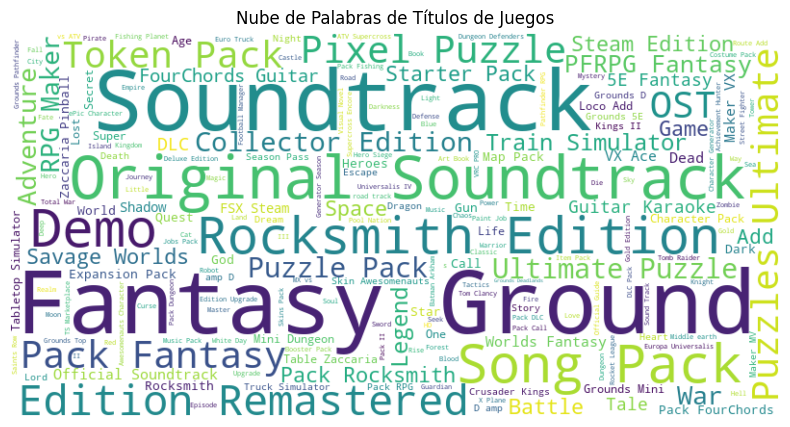

In [14]:


# Se concatena todos los títulos en una sola cadena
text = ' '.join(df_games['title'].astype(str))

# Se crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(text)

# Se visualiza la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Títulos de Juegos')
plt.show()

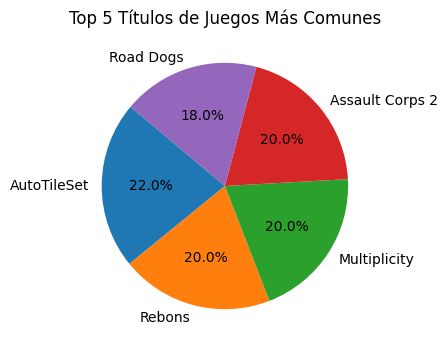

In [15]:
# Se obtienen las frecuencias de los títulos
title_frequencies = Counter(df_games['title'])

# Se obtienen los 5 valores más comunes
top_titles = title_frequencies.most_common(5)

# Se extraer las etiquetas y valores para el gráfico de torta
labels, values = zip(*top_titles)

# Se crea el gráfico de torta
plt.figure(figsize=(4, 4))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Títulos de Juegos Más Comunes')
plt.show()

CONCLUSION: se visualizan los 5 títulos de juegos más importantes y en la nube de palabras se puede ver todos los títulos presentes en los registros. Hay mucho desarrollados que se tendrán que ver a la hora de relacionarlos con los más jugados o consumidos. 